<a href="https://colab.research.google.com/github/bjoyita/SHAP_Tutorial/blob/main/MultiOutputRegressor_RF_Norm_k_PF_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Libraries**

 **Random Forest: kappa, Power Factor at room temperature**

In [ ]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

**Installing Materials Data Minining tools **

In [ ]:
pip install pymatgen

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install matminer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Loading data**

In [ ]:
ds_RT = pd.read_csv('Pf_kappa_RT_2.csv')
ds_RT

,Formula,kappa,PF
0,Ca0.98Bi0.02Mn0.98Nb0.02O3.0,2.513,0.000049
1,Ca0.96Bi0.04Mn0.96Nb0.04O3.0,2.268,0.000094
2,Ca1.0Mn0.98Nb0.02O3.0,2.500,0.000162
3,Ca1.0Gd0.96Mn0.04O3.0,1.787,0.000177
4,Ca1.0Gd0.94Mn0.06O3.0,2.850,0.000075
...,...,...,...
199,Mg1.9Ca0.1Si1.0,5.200,0.000176
200,Mg2.0Si1.0,7.250,0.002600
201,Fe0.998Co0.002Si2.0,5.690,0.000077
202,Fe0.978Co0.00196Si1.96Y0.04O0.06,4.590,0.000079


**Data preprocessing for Machine Learning**

**Importing Composition and ElementFraction**

In [ ]:
from pymatgen.core.composition import Composition
from matminer.featurizers.composition import ElementFraction
ef = ElementFraction()
element_fraction_labels = ef.feature_labels()
print(element_fraction_labels)

['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In', 'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm', 'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta', 'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At', 'Rn', 'Fr', 'Ra', 'Ac', 'Th', 'Pa', 'U', 'Np', 'Pu', 'Am', 'Cm', 'Bk', 'Cf', 'Es', 'Fm', 'Md', 'No', 'Lr']


In [ ]:
ds_RT['Formula']
Comp = []
for value in ds_RT['Formula']:
  Comp.append(Composition(value))
Comp

[Comp: Ca0.98 Mn0.98 Nb0.02 Bi0.02 O3,
 Comp: Ca0.96 Mn0.96 Nb0.04 Bi0.04 O3,
 Comp: Ca1 Mn0.98 Nb0.02 O3,
 Comp: Ca1 Gd0.96 Mn0.04 O3,
 Comp: Ca1 Gd0.94 Mn0.06 O3,
 Comp: Ca0.9 Tb0.1 Mn1 O3,
 Comp: Ca0.7 Tb0.3 Mn1 O3,
 Comp: Ca0.9 Ho0.1 Mn1 O3,
 Comp: Ca0.7 Ho0.3 Mn1 O3,
 Comp: Ca0.9 Y0.1 Mn1 O3,
 Comp: Ca0.7 Y0.3 Mn1 O3,
 Comp: Ca1 Mn1 O3,
 Comp: Ca1 Yb0.05 Mn0.95 O3,
 Comp: Ca1 Yb0.1 Mn0.9 O3,
 Comp: Ca1 Yb0.15 Mn0.85 O3,
 Comp: Ca0.3 Sm1.7 Mn1 O3,
 Comp: Ca0.5 Sm0.5 Mn1 O3,
 Comp: Ca1 Mn1 O3,
 Comp: Ca0.9 Mn1 Bi0.1 O3,
 Comp: Ca1 Mn1 O3,
 Comp: In2 O3,
 Comp: In1.998 Ge0.002 O3,
 Comp: In1.994 Ge0.006 O3,
 Comp: In1.985 Ge0.015 O3,
 Comp: In1.94 Ge0.06 O3,
 Comp: In1.9 Ge0.1 O3,
 Comp: In1.8 Ge0.2 O3,
 Comp: Sr2 Ti0.8 Nb0.2 O4,
 Comp: Sr3 Ti1.6 Nb0.4 O7,
 Comp: Sr1 Ti0.8 Nb0.2 O3,
 Comp: Sr0.9 La0.1 Ti1 O3,
 Comp: Sr1 Ti0.8 Nb0.2 O3,
 Comp: Zn1 O1,
 Comp: Al0.005 Zn0.995 O1,
 Comp: Al0.01 Zn0.99 O1,
 Comp: Al0.02 Zn0.98 O1,
 Comp: Al0.05 Zn0.95 O1,
 Comp: Sr1 Ti0.85 Nb0.15 O3,
 Com

In [ ]:
ds_RT['Composition'] = Comp
ds_RT

,Formula,kappa,PF,Composition
0,Ca0.98Bi0.02Mn0.98Nb0.02O3.0,2.513,0.000049,"(Ca, Bi, Mn, Nb, O)"
1,Ca0.96Bi0.04Mn0.96Nb0.04O3.0,2.268,0.000094,"(Ca, Bi, Mn, Nb, O)"
2,Ca1.0Mn0.98Nb0.02O3.0,2.500,0.000162,"(Ca, Mn, Nb, O)"
3,Ca1.0Gd0.96Mn0.04O3.0,1.787,0.000177,"(Ca, Gd, Mn, O)"
4,Ca1.0Gd0.94Mn0.06O3.0,2.850,0.000075,"(Ca, Gd, Mn, O)"
...,...,...,...,...
199,Mg1.9Ca0.1Si1.0,5.200,0.000176,"(Mg, Ca, Si)"
200,Mg2.0Si1.0,7.250,0.002600,"(Mg, Si)"
201,Fe0.998Co0.002Si2.0,5.690,0.000077,"(Fe, Co, Si)"
202,Fe0.978Co0.00196Si1.96Y0.04O0.06,4.590,0.000079,"(Fe, Co, Si, Y, O)"


**Incorporating Composition and individual element of periodic table in the dataframe**

In [ ]:
ds_RT = ef.featurize_dataframe(ds_RT,'Composition')
ds_RT

ElementFraction:   0%|          | 0/204 [00:00<?, ?it/s]

,Formula,kappa,PF,Composition,H,He,Li,Be,B,C,...,Pu,Am,Cm,Bk,Cf,Es,Fm,Md,No,Lr
0,Ca0.98Bi0.02Mn0.98Nb0.02O3.0,2.513,0.000049,"(Ca, Bi, Mn, Nb, O)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ca0.96Bi0.04Mn0.96Nb0.04O3.0,2.268,0.000094,"(Ca, Bi, Mn, Nb, O)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ca1.0Mn0.98Nb0.02O3.0,2.500,0.000162,"(Ca, Mn, Nb, O)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ca1.0Gd0.96Mn0.04O3.0,1.787,0.000177,"(Ca, Gd, Mn, O)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ca1.0Gd0.94Mn0.06O3.0,2.850,0.000075,"(Ca, Gd, Mn, O)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Mg1.9Ca0.1Si1.0,5.200,0.000176,"(Mg, Ca, Si)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
200,Mg2.0Si1.0,7.250,0.002600,"(Mg, Si)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
201,Fe0.998Co0.002Si2.0,5.690,0.000077,"(Fe, Co, Si)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0
202,Fe0.978Co0.00196Si1.96Y0.04O0.06,4.590,0.000079,"(Fe, Co, Si, Y, O)",0,0,0,0,0.0,0,...,0,0,0,0,0,0,0,0,0,0


**Dimensionality Reduction: Dropping columns with 0 values only**

In [ ]:
ds_RT = ds_RT.loc[:, (ds_RT != 0).any(axis=0)]
ds_RT

,Formula,kappa,PF,Composition,B,O,Na,Mg,Al,Si,...,Tb,Dy,Ho,Yb,Hf,W,Au,Tl,Pb,Bi
0,Ca0.98Bi0.02Mn0.98Nb0.02O3.0,2.513,0.000049,"(Ca, Bi, Mn, Nb, O)",0.0,0.600000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004
1,Ca0.96Bi0.04Mn0.96Nb0.04O3.0,2.268,0.000094,"(Ca, Bi, Mn, Nb, O)",0.0,0.600000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008
2,Ca1.0Mn0.98Nb0.02O3.0,2.500,0.000162,"(Ca, Mn, Nb, O)",0.0,0.600000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,Ca1.0Gd0.96Mn0.04O3.0,1.787,0.000177,"(Ca, Gd, Mn, O)",0.0,0.600000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,Ca1.0Gd0.94Mn0.06O3.0,2.850,0.000075,"(Ca, Gd, Mn, O)",0.0,0.600000,0.0,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Mg1.9Ca0.1Si1.0,5.200,0.000176,"(Mg, Ca, Si)",0.0,0.000000,0.0,0.633333,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
200,Mg2.0Si1.0,7.250,0.002600,"(Mg, Si)",0.0,0.000000,0.0,0.666667,0.0,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
201,Fe0.998Co0.002Si2.0,5.690,0.000077,"(Fe, Co, Si)",0.0,0.000000,0.0,0.000000,0.0,0.666667,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
202,Fe0.978Co0.00196Si1.96Y0.04O0.06,4.590,0.000079,"(Fe, Co, Si, Y, O)",0.0,0.019737,0.0,0.000000,0.0,0.644745,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
ds_RT = ds_RT.drop(['Composition'], axis = 1)
ds_RT

,Formula,kappa,PF,B,O,Na,Mg,Al,Si,P,...,Tb,Dy,Ho,Yb,Hf,W,Au,Tl,Pb,Bi
0,Ca0.98Bi0.02Mn0.98Nb0.02O3.0,2.513,0.000049,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004
1,Ca0.96Bi0.04Mn0.96Nb0.04O3.0,2.268,0.000094,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008
2,Ca1.0Mn0.98Nb0.02O3.0,2.500,0.000162,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
3,Ca1.0Gd0.96Mn0.04O3.0,1.787,0.000177,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
4,Ca1.0Gd0.94Mn0.06O3.0,2.850,0.000075,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Mg1.9Ca0.1Si1.0,5.200,0.000176,0.0,0.000000,0.0,0.633333,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
200,Mg2.0Si1.0,7.250,0.002600,0.0,0.000000,0.0,0.666667,0.0,0.333333,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
201,Fe0.998Co0.002Si2.0,5.690,0.000077,0.0,0.000000,0.0,0.000000,0.0,0.666667,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000
202,Fe0.978Co0.00196Si1.96Y0.04O0.06,4.590,0.000079,0.0,0.019737,0.0,0.000000,0.0,0.644745,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000


In [ ]:
ds_RT.columns

Index(['Formula', 'kappa', 'PF', 'B', 'O', 'Na', 'Mg', 'Al', 'Si', 'P', 'S',
       'K', 'Ca', 'Ti', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge',
       'Se', 'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Ag', 'In', 'Sn', 'Sb', 'Te', 'I',
       'Cs', 'Ba', 'La', 'Ce', 'Nd', 'Sm', 'Gd', 'Tb', 'Dy', 'Ho', 'Yb', 'Hf',
       'W', 'Au', 'Tl', 'Pb', 'Bi'],
      dtype='object')

**Data Ready for Machine Learning**



In [ ]:
ds_RT = ds_RT.reindex(columns = ['Formula','B', 'O', 'Na', 'Mg', 'Al', 'Si', 'P', 'S', 'K', 'Ca',
       'Ti', 'Cr', 'Mn', 'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'Se', 'Sr',
       'Y', 'Zr', 'Nb', 'Mo', 'Ag', 'In', 'Sn', 'Sb', 'Te', 'I', 'Cs', 'Ba',
       'La', 'Ce', 'Nd', 'Sm', 'Gd', 'Tb', 'Dy', 'Ho', 'Yb', 'Hf', 'W', 'Au',
       'Tl', 'Pb', 'Bi', 'kappa', 'PF'])

In [ ]:
ds_RT

,Formula,B,O,Na,Mg,Al,Si,P,S,K,...,Ho,Yb,Hf,W,Au,Tl,Pb,Bi,kappa,PF
0,Ca0.98Bi0.02Mn0.98Nb0.02O3.0,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004,2.513,0.000049
1,Ca0.96Bi0.04Mn0.96Nb0.04O3.0,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.008,2.268,0.000094
2,Ca1.0Mn0.98Nb0.02O3.0,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,2.500,0.000162
3,Ca1.0Gd0.96Mn0.04O3.0,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,1.787,0.000177
4,Ca1.0Gd0.94Mn0.06O3.0,0.0,0.600000,0.0,0.000000,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,2.850,0.000075
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199,Mg1.9Ca0.1Si1.0,0.0,0.000000,0.0,0.633333,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,5.200,0.000176
200,Mg2.0Si1.0,0.0,0.000000,0.0,0.666667,0.0,0.333333,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,7.250,0.002600
201,Fe0.998Co0.002Si2.0,0.0,0.000000,0.0,0.000000,0.0,0.666667,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,5.690,0.000077
202,Fe0.978Co0.00196Si1.96Y0.04O0.06,0.0,0.019737,0.0,0.000000,0.0,0.644745,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,4.590,0.000079


**Model fitting to see the effect of individual elements **

In [ ]:
X = ds_RT.iloc[:, 1: 50]

In [ ]:
y = ds_RT.iloc[:, 50:]

In [ ]:
print(y)

     kappa        PF
0    2.513  0.000049
1    2.268  0.000094
2    2.500  0.000162
3    1.787  0.000177
4    2.850  0.000075
..     ...       ...
199  5.200  0.000176
200  7.250  0.002600
201  5.690  0.000077
202  4.590  0.000079
203  2.860  0.000019

[204 rows x 2 columns]


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

**Normalization of target variables**

In [ ]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()
y_train = sc.fit_transform(y_train)
y_test = sc.transform(y_test)

In [ ]:
print(y_train)

[[1.38000000e-01 4.04160460e-01]
 [7.38144330e-02 2.31797663e-02]
 [6.26391753e-02 1.41604496e-02]
 [5.29278351e-02 5.67607715e-01]
 [2.61855670e-02 6.83504074e-03]
 [1.71134021e-01 3.17979180e-01]
 [4.00824742e-02 5.54232154e-03]
 [1.25773196e-02 1.17979174e-01]
 [3.64948454e-03 1.35843986e-05]
 [3.48453608e-01 9.22731421e-03]
 [4.65979381e-02 4.07131991e-02]
 [8.86597938e-02 7.25111197e-02]
 [7.87010309e-02 1.00000000e+00]
 [3.03092784e-02 1.22731400e-03]
 [1.45360825e-01 3.86329850e-01]
 [1.78721649e-01 4.27934369e-02]
 [1.17113402e-01 5.40861564e-02]
 [1.39381443e-01 3.92273387e-01]
 [5.31958763e-02 2.21394107e-03]
 [5.24948454e-02 1.91678791e-02]
 [1.60412371e-01 2.49628509e-01]
 [1.78536082e-01 2.68945003e-01]
 [2.72164948e-02 4.68053241e-02]
 [5.75257732e-02 4.84371930e-04]
 [1.55876289e-02 2.60029462e-02]
 [1.55051546e-01 7.91975984e-02]
 [3.71134021e-02 2.76374187e-02]
 [5.64948454e-02 7.81574795e-02]
 [3.71134021e-02 1.90192907e-02]
 [8.53608247e-02 1.81277839e-01]
 [1.228865

**Fitting Random Forest Model**
*(Multioutput regressor algorithm of Scikit learn doesnot support Treeexplainer of SHAP.)*

In [ ]:
regr_rf = RandomForestRegressor(n_estimators=100, random_state=0)
regr_rf.fit(X_train, y_train)

RandomForestRegressor(random_state=0)

**SHAP (SHapley Additive exPlanations) is a game theory approach to explain the output of any machine learning mode.**

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap
e_rf = shap.TreeExplainer(regr_rf)
shap_values_rf = e_rf.shap_values(X_train)
print(shap_values_rf)

[array([[-2.76075342e-05, -8.43843322e-03, -5.54990601e-04, ...,
         2.02134458e-04, -4.16072158e-04,  7.00593077e-04],
       [-3.31463068e-05,  1.48248540e-02, -1.06689115e-03, ...,
         2.53355788e-04,  9.26132410e-04,  4.49028293e-04],
       [-3.15296055e-05,  2.10629071e-02, -9.47784598e-04, ...,
         2.72807696e-04, -4.34299325e-04,  6.04287334e-04],
       ...,
       [-2.76140909e-05, -8.41952564e-03, -5.54105893e-04, ...,
         2.02131268e-04, -4.16238741e-04,  7.35543646e-04],
       [-2.78200038e-05,  1.33489542e-02, -1.00149266e-03, ...,
         1.38849783e-04, -4.09862066e-04,  4.02520948e-04],
       [ 1.10406219e-06,  1.75591655e-03, -9.10076736e-04, ...,
         1.09096146e-02,  4.09576651e-04,  6.81640002e-04]]), array([[-9.16375664e-05,  4.22376849e-03, -6.01320968e-04, ...,
        -4.30874203e-04, -1.55210418e-03, -7.93349144e-03],
       [-1.03337850e-04, -1.52079053e-02, -1.34449895e-03, ...,
        -4.18485799e-04,  1.20812854e-03, -1.04868320

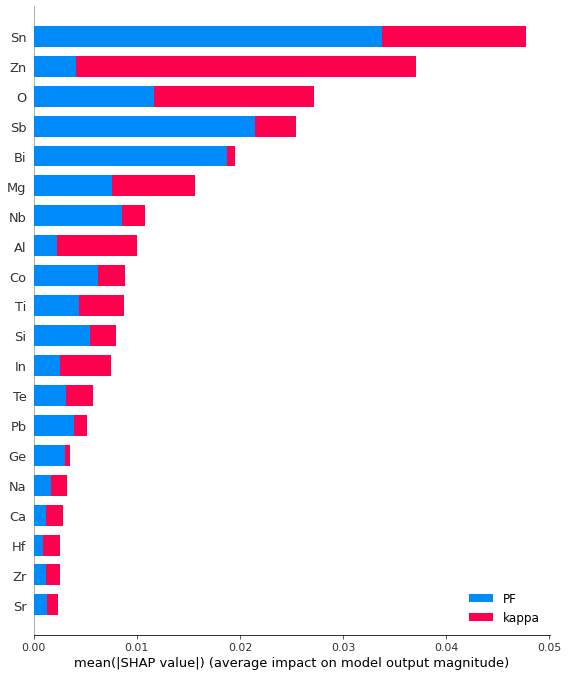

In [ ]:
class_names = y.columns
shap.summary_plot(shap_values_rf, X_train, class_names= class_names)

**Influence on kappa - thermal conductivity**

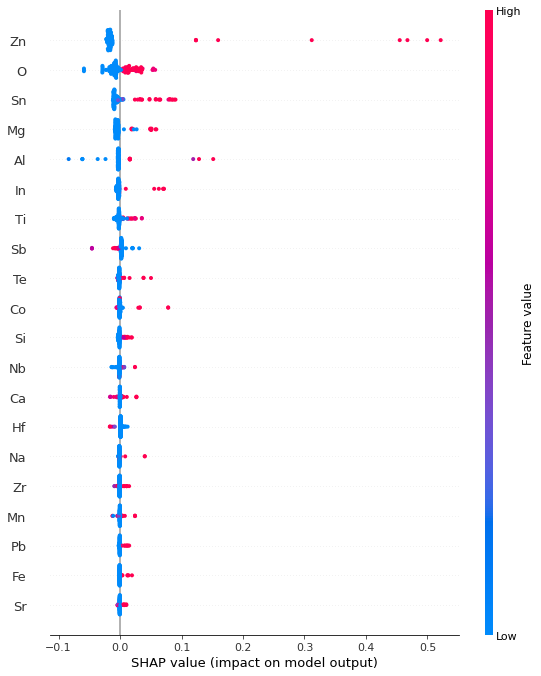

In [ ]:
shap.summary_plot(shap_values_rf[0], X_train)

**Influence on PF - Power factor**

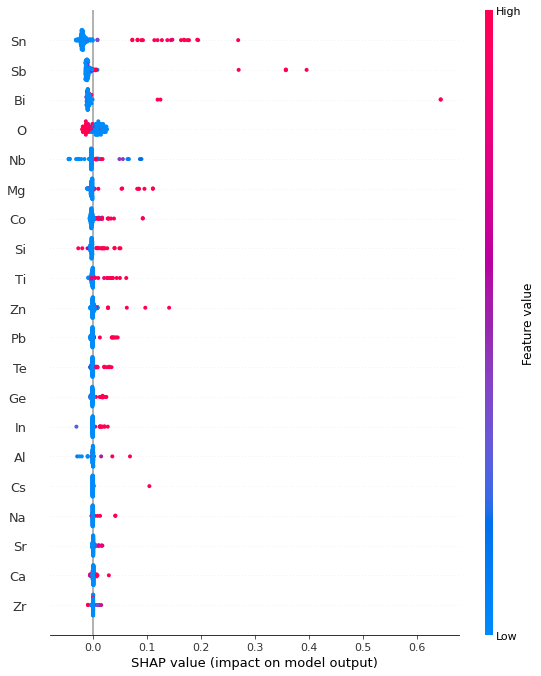

In [ ]:
shap.summary_plot(shap_values_rf[1], X_train)

**PREDICTION**

In [ ]:
y_rf = regr_rf.predict(X_test)

In [ ]:
y_rf_df = pd.DataFrame(y_rf, index=None)
y_rf_df = y_rf_df.rename(columns ={0: 'k_pred', 1: 'PF_pred'}, inplace=False)

In [ ]:
y_test_df = pd.DataFrame(y_test, index=None)
y_test_df = y_test_df.rename(columns ={0: 'kappa', 1: 'PF'}, inplace=False)


In [ ]:
Combined = y_test_df.join(y_rf_df)
display(Combined)

,kappa,PF,k_pred,PF_pred
0,0.069918,0.027340,0.059350,0.014632
1,0.032990,0.023328,0.041663,0.014381
2,0.913299,0.062704,0.359120,0.029456
3,0.117113,0.000005,0.119855,0.010320
4,0.120000,0.015305,0.176513,0.154384
5,0.020948,0.134472,0.019988,0.109352
6,0.026474,0.014502,0.059946,0.014808
7,0.074515,0.058544,0.080432,0.134630
8,0.026598,0.019316,0.069562,0.021232
9,0.022371,0.017682,0.028603,0.181560
